In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv('fifa_2023.csv')
df = df.drop(columns='Unnamed: 0')
df.head()

,name,rating,card_type,position,nation,league,team,PAC,SHO,PAS,DRI,DEF,PHY
0,Lionel Messi,98,team-of-the-season,ST,Argentina,Ligue 1 Uber Eats,Paris SG,94,97,96,99,40,79
1,Lionel Messi,98,team-of-the-year,RW,Argentina,Ligue 1 Uber Eats,Paris SG,93,98,97,99,40,77
2,Pelé,98,icon,CAM,Brazil,Icons,Icons,95,96,93,96,60,76
3,Jude Bellingham,97,award-winner,CM,England,Bundesliga,Borussia Dortmund,90,90,94,98,93,94
4,Victor Osimhen,97,award-winner,ST,Nigeria,Serie A TIM,Napoli,99,97,82,94,55,95


# Step 1: Data Cleaning

In [37]:
# Are there any duplicate rows in the data?

df[df.duplicated()] #yes

,name,rating,card_type,position,nation,league,team,PAC,SHO,PAS,DRI,DEF,PHY
508,Oleksandr Zinchenko,90,fut-birthday,LB,Ukraine,Premier League,Arsenal,90,78,89,90,87,81
670,Darwin Núñez,89,fut-birthday,LW,Uruguay,Premier League,Liverpool,95,88,77,86,48,92
841,Mattéo Guendouzi,88,fut-birthday,CM,France,Ligue 1 Uber Eats,OM,83,82,87,84,86,89
848,Koke,88,fut-birthday,CM,Spain,LaLiga Santander,Atlético de Madrid,80,81,90,85,83,84
944,Diogo Dalot,88,world-cup-team-of-the-tournament,RB,Portugal,Premier League,Manchester Utd,89,73,85,88,85,87
1063,Matteo Pessina,87,fut-birthday,CAM,Italy,Serie A TIM,AC Monza,86,84,86,88,81,81
1203,Ciro Immobile,87,team-of-the-week,ST,Italy,Serie A TIM,Latium,86,88,70,81,40,77
1321,Joakim Mæhle,86,fut-birthday,RWB,Denmark,Serie A TIM,Bergamo Calcio,94,70,82,85,82,86
1437,Kieran Trippier,86,team-of-the-week,RB,England,Premier League,Newcastle Utd,73,66,84,80,82,75
1450,Theo Hernández,86,team-of-the-week,LB,France,Serie A TIM,Milan,94,73,78,82,80,84


In [39]:
df = df.drop_duplicates(ignore_index=True)
df.duplicated().value_counts()

False    9986
Name: count, dtype: int64

In [49]:
# Are there any null or missing values

df.isnull().sum()

#379 null values in the leauge column and 350 null values in the team column

name           0
rating         0
card_type      0
position       0
nation         0
league       379
team         350
PAC            0
SHO            0
PAS            0
DRI            0
DEF            0
PHY            0
dtype: int64

In [61]:
df = df.dropna(how='any') #drop the rows that have nan values
df.isna().sum()

name         0
rating       0
card_type    0
position     0
nation       0
league       0
team         0
PAC          0
SHO          0
PAS          0
DRI          0
DEF          0
PHY          0
dtype: int64

In [74]:
# Are there any outliers in numeric columns that should be investigated?

df.loc[:, 'PAC':'PHY'].describe().loc[['mean', 'min', 'max', '50%']]

,PAC,SHO,PAS,DRI,DEF,PHY
mean,74.210576,63.848652,68.391902,72.905173,59.206932,72.579994
min,29.000000,18.000000,36.000000,35.000000,17.000000,34.000000
max,99.000000,99.000000,99.000000,99.000000,97.000000,99.000000
50%,75.000000,66.000000,68.000000,72.000000,64.000000,73.000000


In [87]:
# detecting outliers using z-score method

z_low, z_high = -3, 3
numeric_cols = [col for col in df.columns if df[col].dtype != 'object']

for col in numeric_cols:
    col_mean = df[col].mean()
    col_std = df[col].std()
    col_z = (df[col] - col_mean) / col_std #df[col] - col_mean will return a series with each entry of the series subtracted col_mean from it

    high_outliers = col_z[col_z > z_high]
    low_outliers = col_z[col_z < z_low]

    print(f"{len(high_outliers)} high outliers and {len(low_outliers)} low outliers in {col} column")


0 high outliers and 0 low outliers in rating column
0 high outliers and 88 low outliers in PAC column
0 high outliers and 0 low outliers in SHO column
0 high outliers and 1 low outliers in PAS column
0 high outliers and 25 low outliers in DRI column
0 high outliers and 0 low outliers in DEF column
0 high outliers and 41 low outliers in PHY column


# Step 2: Data Analysis

## What is the distribution of player ratings? Generate a histogram.


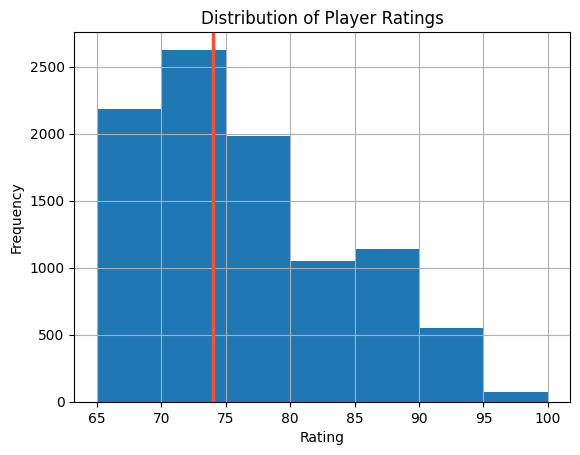

In [104]:
bins = [i for i in range(65, 101, 5)]
df['rating'].hist(bins=bins)

median = df['rating'].median()
plt.axvline(median, color='#fc4f30', linewidth=2.5)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Player Ratings')
plt.show()

# Which positions have the highest rated players on average? Generate a bar chart.


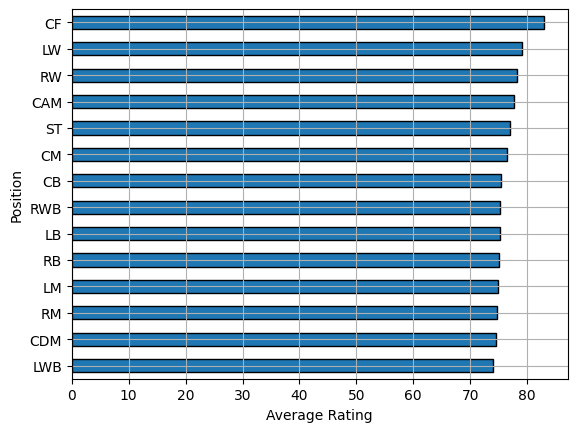

In [132]:
df.groupby('position')['rating'].mean().sort_values().plot(kind='barh', grid=True, edgecolor='black', rot=0)
plt.xlabel('Average Rating')
plt.ylabel('Position')
plt.show()

# Which leagues have the highest rated players on average? Generate a bar chart.


In [144]:
dist = df.groupby('league')['rating'].mean()
dist.idxmax(), dist.max()

('Icons', 89.85526315789474)

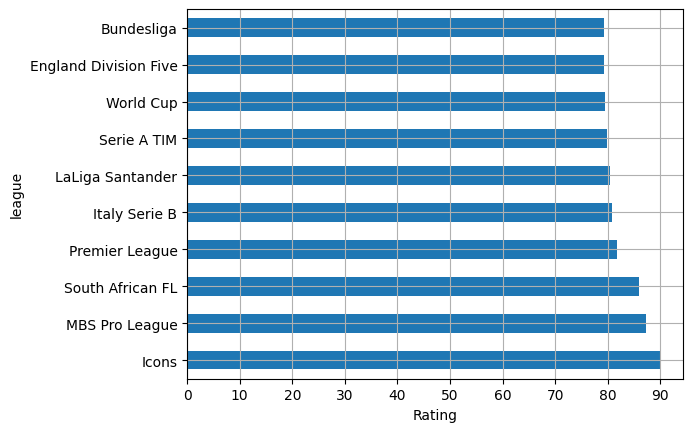

In [185]:
dist.sort_values(ascending=False)[:10].plot(kind='barh', grid=True)
plt.xlabel('Rating')
plt.xticks(list(range(0, 91, 10)))
plt.show()

# What is the correlation between physical attributes (PHY, PAC, DRI) and pl